# Storytelling Data Visualization on EUR-USD and EUR-GBP Exchange Rates

***

## Introduction
At the beginning of this course, we learned that there are two types of data visualization:

-   Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
-   Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.
Throughout the course, we focused on explanatory data visualization and learned the following:

-   How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
-   About the elements of a story and how to create storytelling data visualizations using Matplotlib.
-   How to create visual patterns using Gestalt principles.
-   How to guide the audience's attention with pre-attentive attributes.
-   How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

The dataset we'll use describes Euro daily exchange rates between 1999 and the first 8 days of 2021. The euro (symbolized with €) is the official currency in most European Union countries.

Daria Chemkaeva assembled the dataset and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020); the data source is the European Central Bank. Note that the dataset gets regular updates *(the dataset was downloaded in January 2021)*.

### Goal

* To explore the variability of the EUR-USD (United States) and EUR-GBP (United Kingdom) exchange rates; and determine their behavior during 2007-2008's financial crisis period.

### Summary of Results

- We determined that the 2007-2008 global financial crisis (which originated in the U.S.) had a significant impact on exchange rates.
- The EUR-USD exchange rate peaked when the crisis was beginning to affect the European zone (April 2008). Later, in January 2009, the EUR-GBP exchange rate would reach its maximum value; when several European countries were starting to be bailed out due to severe financial problems.
- We also observed how the EUR-GBP exchange rate increased (mid-2016) because of the negotiations for the withdrawal of the United Kingdom from the European Union (Brexit).

***

## Initial Exploration of the Dataset

We import the libraries necessary for the development of the project and configure pandas to get a better view of the data.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as tick
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:,.2f}".format

In [43]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.50,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.87,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.01,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.30,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.87,91.2000,10.0575,1.6253,NaN,NaN,36.8590,9.00,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.30,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.87,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.06,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,NaN,0.90333,NaN,9.5136,7.5588,360.27,17075.10,3.9277,89.8670,156.10,126.25,1335.85,NaN,NaN,NaN,24.5860,4.9293,10.4713,1.7036,59.020,4.5473,4.87,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.07,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,NaN,0.90160,NaN,9.5330,7.5565,361.32,17062.67,3.9430,89.7890,156.10,126.62,1332.03,NaN,NaN,NaN,24.3031,4.9264,10.4440,1.7065,59.058,4.5475,4.87,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.06,1.2296,17.9214


In [44]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.31,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.37,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.31,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.37,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.32,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.37,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.32,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.37,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.31,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.37,1.1789,6.9358


In [45]:
def thousands_sep_format(n):
    return '{:,}'.format(n)

def df_info(df):
    rows = df.shape[0]
    cols = df.shape[1]
    
    non_null_count = df.count()
    info_df = pd.DataFrame(non_null_count, columns=['Non-Null Count'])
    info_df['Non-Null Count'] = info_df['Non-Null Count'].apply(thousands_sep_format)
    info_df.index.name = 'COLUMN NAME'
    info_df['Missing Values %'] = round((df.isnull().sum()/len(df)) * 100, 2)
    info_df['DType'] = df.dtypes
    
    print('Total Rows: {:,}\nTotal Columns: {}'.format(rows, cols))
    print(info_df)
    del info_df

def gen_line_plot(df, xcol, ycol, color=None, title=None, xlabel=None, ylabel=None, xlim=None, ylim=None):
    plt.plot(df[xcol], df[ycol], color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=13)
    if ylabel == None:
        ylabel = ycol.replace('_', ' ')
    plt.ylabel(ylabel, fontsize=13)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    sns.despine()

Now, let's look at detailed information about the dataset.

In [46]:
print('Exchange Rates <DataFrame>:', '-' * 27, sep='\n')
df_info(exchange_rates)

Exchange Rates <DataFrame>:
---------------------------
Total Rows: 5,699
Total Columns: 41
                         Non-Null Count  Missing Values %    DType
COLUMN NAME                                                       
Period\Unit:                      5,699              0.00   object
[Australian dollar ]              5,699              0.00   object
[Bulgarian lev ]                  5,297              7.05   object
[Brazilian real ]                 5,431              4.70   object
[Canadian dollar ]                5,699              0.00   object
[Swiss franc ]                    5,699              0.00   object
[Chinese yuan renminbi ]          5,431              4.70   object
[Cypriot pound ]                  2,346             58.83   object
[Czech koruna ]                   5,699              0.00   object
[Danish krone ]                   5,699              0.00   object
[Estonian kroon ]                 3,130             45.08   object
[UK pound sterling ]              5,6


**Remarks:**

- The dataset consists of 5,699 records (rows) and 41 fields (columns).
- The first column contains the date on which the exchange rate of the local currency to the euro was recorded.
- The columns following the first one represent the exchange rate of each country's local currency to the euro.
- There are some exchange rate columns that contain null values. Being the column `[Greek drachma ]` with the highest amount of null values (about 91% of its values).
- Most of the columns have values of the data type ***object***. However, we can see some exceptions, which include the columns: 'Iceland krona', 'Romanian leu' and 'Turkish lira'; whose data types are ***float64***.

***

## Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning. To leave you more time to practice your data visualization skills, we'll provide you with most of the code necessary for data cleaning.

Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar. If you want to explore a different currency after finishing the guided part, the code we use for cleaning will come in handy.

Below, we do the following:

-   We rename the `Period\Unit:`, `[US dollar ]`, `[UK pound sterling ]` columns to something easier to type — -US_dollar and Time.
-   We change the Time column to a datetime data type.
-   We sort the values by Time in ascending order.
-   We reset the index (and drop the initial index).

In [47]:
# Renaming the columns
exchange_rates.rename(columns={'Period\\Unit:': 'Time',
                               '[UK pound sterling ]': 'GBP',
                               '[US dollar ]': 'USD'},
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# Isolating the necessary columns
euro_to_dollar = exchange_rates[['Time', 'USD']]
euro_to_gbp = exchange_rates[['Time', 'GBP']]

print('EUR-USD | FREQUENCY TABLE:', euro_to_dollar['USD'].value_counts(), sep = '\n')
print('\nEUR-GBP | FREQUENCY TABLE:', euro_to_gbp['GBP'].value_counts(), sep='\n')

EUR-USD | FREQUENCY TABLE:
USD
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

EUR-GBP | FREQUENCY TABLE:
GBP
-          62
0.63040     7
0.67930     7
0.84560     7
0.90430     7
           ..
0.90143     1
0.90080     1
0.89470     1
0.89305     1
0.90128     1
Name: count, Length: 3470, dtype: int64


In each of the new dataframes generated, note that there are 62 values equal to **"-"**; then we'll just keep the numeric values and then convert them to the **float** data type.

In [48]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['USD'] != '-']
euro_to_gbp = euro_to_gbp[euro_to_gbp['GBP'] != '-']

euro_to_dollar['USD'] = euro_to_dollar['USD'].astype(float)
euro_to_gbp['GBP'] = euro_to_gbp['GBP'].astype(float)

print('EUR-to-USD <Dataframe>:', '-' * 20, sep = '\n')
df_info(euro_to_dollar)
print('\n')
print('EUR-to-GBP <Dataframe>:', '-' * 20, sep = '\n')
df_info(euro_to_gbp)

EUR-to-USD <Dataframe>:
--------------------
Total Rows: 5,637
Total Columns: 2
            Non-Null Count  Missing Values %           DType
COLUMN NAME                                                 
Time                 5,637              0.00  datetime64[ns]
USD                  5,637              0.00         float64


EUR-to-GBP <Dataframe>:
--------------------
Total Rows: 5,637
Total Columns: 2
            Non-Null Count  Missing Values %           DType
COLUMN NAME                                                 
Time                 5,637              0.00  datetime64[ns]
GBP                  5,637              0.00         float64


***
## Applying the Rolling Mean Concept
Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.


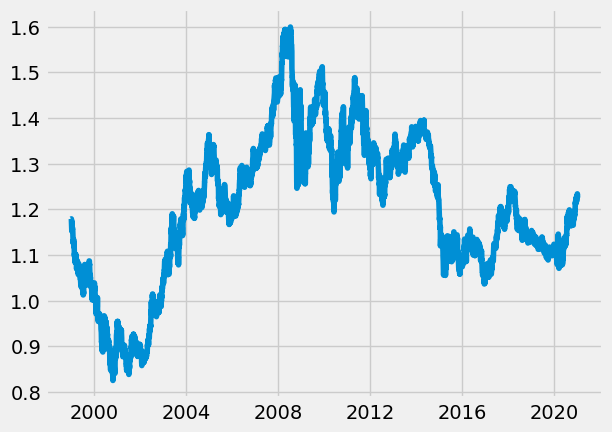

In [49]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['USD'])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

We have observed that exchange rates have been recorded on a daily basis. We see exchange rate values going up and down frequently, day after day. This will cause us to see a lot of little wiggles on our line plot, rather than seeing a smooth line.

Depending on our objectives, we may not want to show that daily variation on our plot. If we want to hide it and show only the long term trends, we can use the **Rolling Mean** concept.

By applying this concept to our data and then making the line plot, we'll get a smoother line with less noise. However, before applying it, there is a parameter that we must take into account to avoid losing too much information. This parameter is called **Moving Window**. The larger the moving window, the smoother the line will be.

For our purpose, we'll apply a moving window of 30 days (1 month). This way we'll better appreciate the charts without losing important information.

Next, we'll apply the moving average technique on the two DataFrames obtained above. To do this, we'll create a column called `rolling_mean` and on it, we'll calculate the moving average with a 30-day moving window.

We can calculate the mean for each day using the pandas.Series.rolling().mean() method — the only exception is the first day, which doesn't have a previous day.

-   values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values

-   values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
-   values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()
values

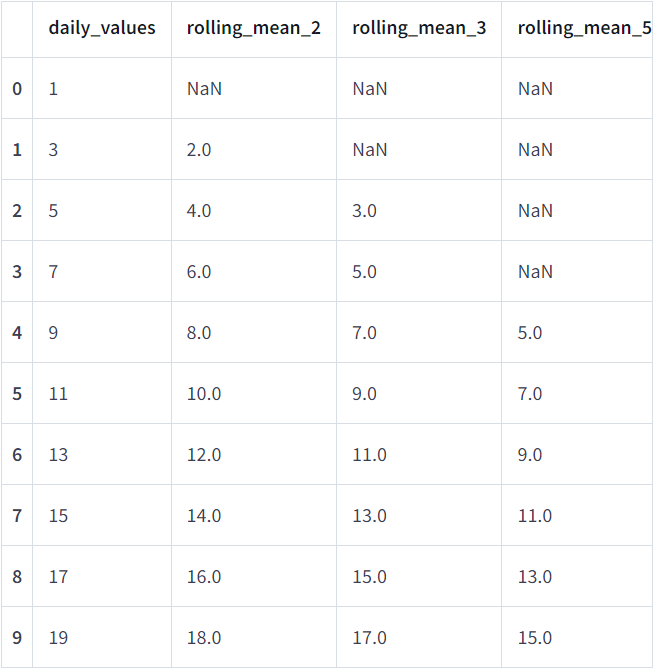

The rolling window can take various values — some common values include seven (one week), 30 (one month), 50 or 100 days, or 365 days (one year).



In [50]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['USD'].rolling(30).mean()
euro_to_gbp['rolling_mean'] = euro_to_gbp['GBP'].rolling(30).mean()

Now that we have calculated the moving average for each DataFrame, we'll plot both situations for both types of change, i.e., the original data and the data with the rolling mean.

In [51]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5637 non-null   datetime64[ns]
 1   USD           5637 non-null   float64       
 2   rolling_mean  5608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 176.2 KB


In [52]:
euro_to_gbp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          5637 non-null   datetime64[ns]
 1   GBP           5637 non-null   float64       
 2   rolling_mean  5608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 176.2 KB


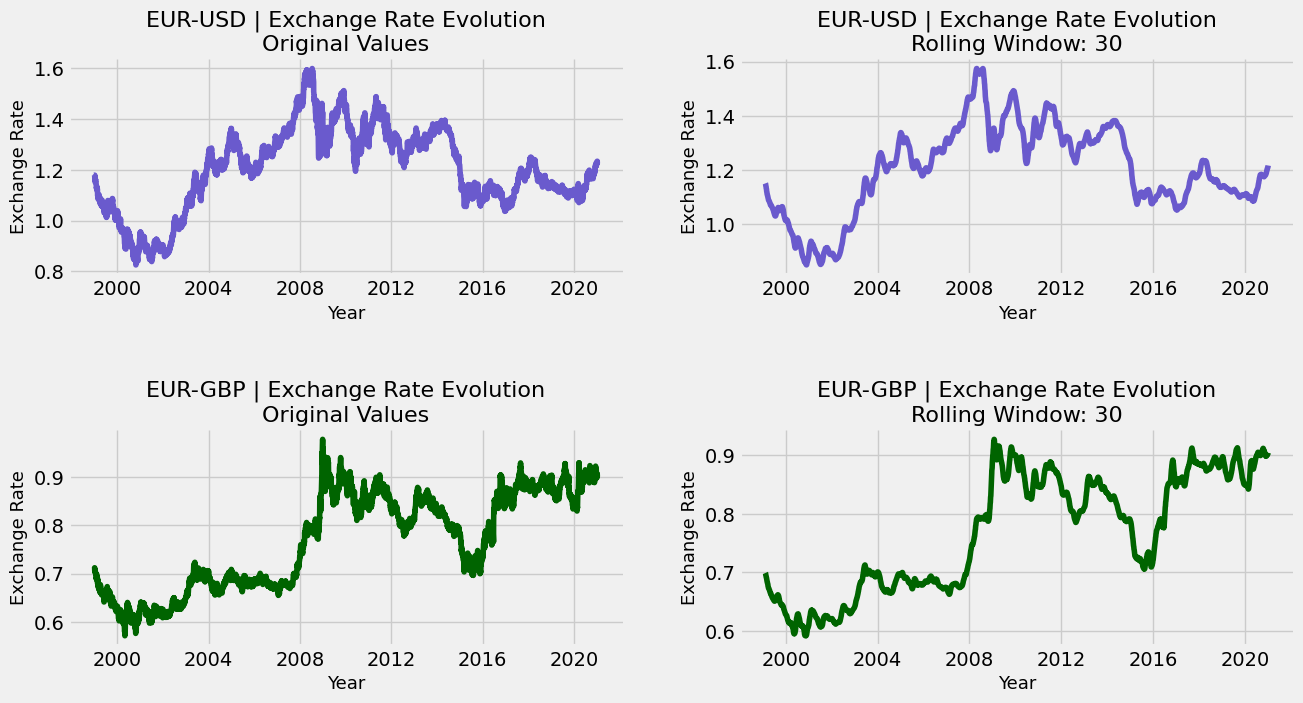

In [53]:
axis = 1
colors = ['slateblue', 'darkgreen']

plt.figure(figsize=(14, 8))
for df, color in zip([euro_to_dollar, euro_to_gbp], colors):
    colume_names = list(df.columns.values[1:])
    currency = colume_names[0]
    for i in range(1, 3):
        plt.subplot(2, 2, axis)
        ycol = colume_names[i - 1]
        title = 'EUR-' + currency + ' | Exchange Rate Evolution\n'
        if (axis % 2) != 0:
            title += 'Original Values'
        else:
            title += 'Rolling Window: 30'
        gen_line_plot(df, 'Time', ycol, color, title, 'Year', 'Exchange Rate')
        axis += 1
        
plt.tight_layout(pad = 3)

We can see that it is much easier to interpret the graphs on the right, which are based on the data with the moving average of each exchange rate.

Giving a quick look at the evolution of both exchange rates, we can mention the following:

- In both cases we see a valley (the lowest values) located around the years 2001-2002.

- Subsequently, since then, in the EUR-USD exchange rate, an almost sustained growth has been observed until 2008 (the maximum peak was reached); which gradually decreases (with very marked variations) until 2015. From then on, the variations are slight.

- On the other hand, in the EUR-GBP exchange rate, we observe a slight growth from 2003 to 2004; remaining with very few variations until the end of 2007. From then on, we observed an almost accelerated growth until 2009 (the maximum peak was reached). Since then, we can see a gradual decline with very marked variations until 2016; however, the values increase rapidly again until the end of 2017 (without exceeding the maximum peak). From then on, the variations are slight.

The maximum peaks reached in both exchange rates would be related to the 2007-2008's financial crisis, which originated in the US and later had an international impact (mainly in Europe).

***
## Proposing a Storytelling Idea

An interesting way of approaching the crises that have occurred on the exchange rate values obtained would be through structured information in the form of a timeline.

For this purpose, we'll rely on information reported in articles from reliable sources and mention specific events. Subsequently, we'll represent them in a line plot.

***
## The 2007-2008's Financial Crisis

> *Information based on the following [article](https://www.magnifymoney.com/blog/banking/2008-financial-crisis-timeline/#january2008FinancialCrisis)*.

* **At the end of 2007,** the US housing market and global credit markets were under pressure. The slowdown in the US economy reduced home values, subprime borrowers began to default on their loans, prompting banks to report huge losses on subprime mortgage investments.

* **January 2008:** Central banks cut market rates for consumers to encourage them to take out mortgages and buy houses, helping current homeowners get out of overpriced and failed mortgages instead of defaulting on their loans.

* **February 2008:** President [George W. Bush](https://en.wikipedia.org/wiki/George_W._Bush) signed the Economic Stimulus Act of 2008. The law included measures to boost consumer and business spending in an attempt to avoid a recession. However, home sales continued to decline and foreclosures continued to rise.

* **April-June 2008:** In early April, the International Monetary Fund (IMF) warned that the financial crisis could go beyond the subprime mortgage market. It warns that global losses could be in excess of \\$1 trillion. In addition, in June the FBI reported that since March it had arrested 406 people who were allegedly part of mortgage fraud schemes.

* **July 2008:** Federal regulators seized [IndyMac Bank](https://en.wikipedia.org/wiki/IndyMac), a major mortgage lender, in early July, making it one of the largest bank failures in US history. In addition, president Bush signed the Housing and Economic Recovery Act of 2008 to combat the housing crisis. Meanwhile, Denmark announced that it was the first country in the European Union to [enter a recession](https://www.independent.ie/business/world/denmark-enters-recession-26458675.html), as its economy contracted for two quarters in a row.

* **September 2008:** [Lehman Brothers](https://en.wikipedia.org/wiki/Lehman_Brothers), a major investment bank, reported quarterly losses of \\$ 4 billion and was probably looking for a company to buy the firm. The US Treasury departmen and private bankers worked together to reach an agreement; however, within days, Lehman Brothers declared bankruptcy, the largest bankruptcy in the history of the U.S.

* **October 2008:** Congress passed a revised version of [TARP](https://en.wikipedia.org/wiki/Troubled_Asset_Relief_Program), and President Bush signed the program into law. TARP gave the government authority to buy "troubled assets" from private companies, in yet another attempt to stabilize the US financial system. However, the crisis spread to the auto industry as car sales fell dramatically. Subsequently, stock markets crashed around the world.

* **November 2008:** Plans were devised to use TARP funds to ease credit markets instead of buying distressed assets from financial institutions.

* **December 2008:** The National Bureau of Economic Research confirmed that the United States was in a recession that had started a year earlier, in December 2007. Additionally, monthly employment reports revealed that more than 500,000 jobs were lost in November.

### Focusing data on the period of the financial crisis

Now we'll capture the facts mentioned above on the plot based on the EUR-USD exchange rate and we'll focus on the data for the year 2008. To do this, we divide the year 2008 into quarters.

In [58]:
fc_us = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
fc_us_7_8 = fc_us.copy()[(fc_us.Time.dt.year >= 2007) & (fc_us.Time.dt.year <= 2008)]
fc_us_8 = fc_us_7_8.copy()[fc_us_7_8.Time.dt.year > 2007]

fc_us_q1 = fc_us_8.copy()[(fc_us_8['Time'] >= '2008-01-01') & (fc_us_8['Time'] < '2008-04-01')]
fc_us_q2 = fc_us_8.copy()[(fc_us_8['Time'] >= '2008-04-01') & (fc_us_8['Time'] < '2008-07-01')]
fc_us_q3 = fc_us_8.copy()[(fc_us_8['Time'] >= '2008-07-01') & (fc_us_8['Time'] < '2008-10-01')]
fc_us_q4 = fc_us_8.copy()[(fc_us_8['Time'] >= '2008-10-01')]

Next, we proceed to encode the storytelling line plot.

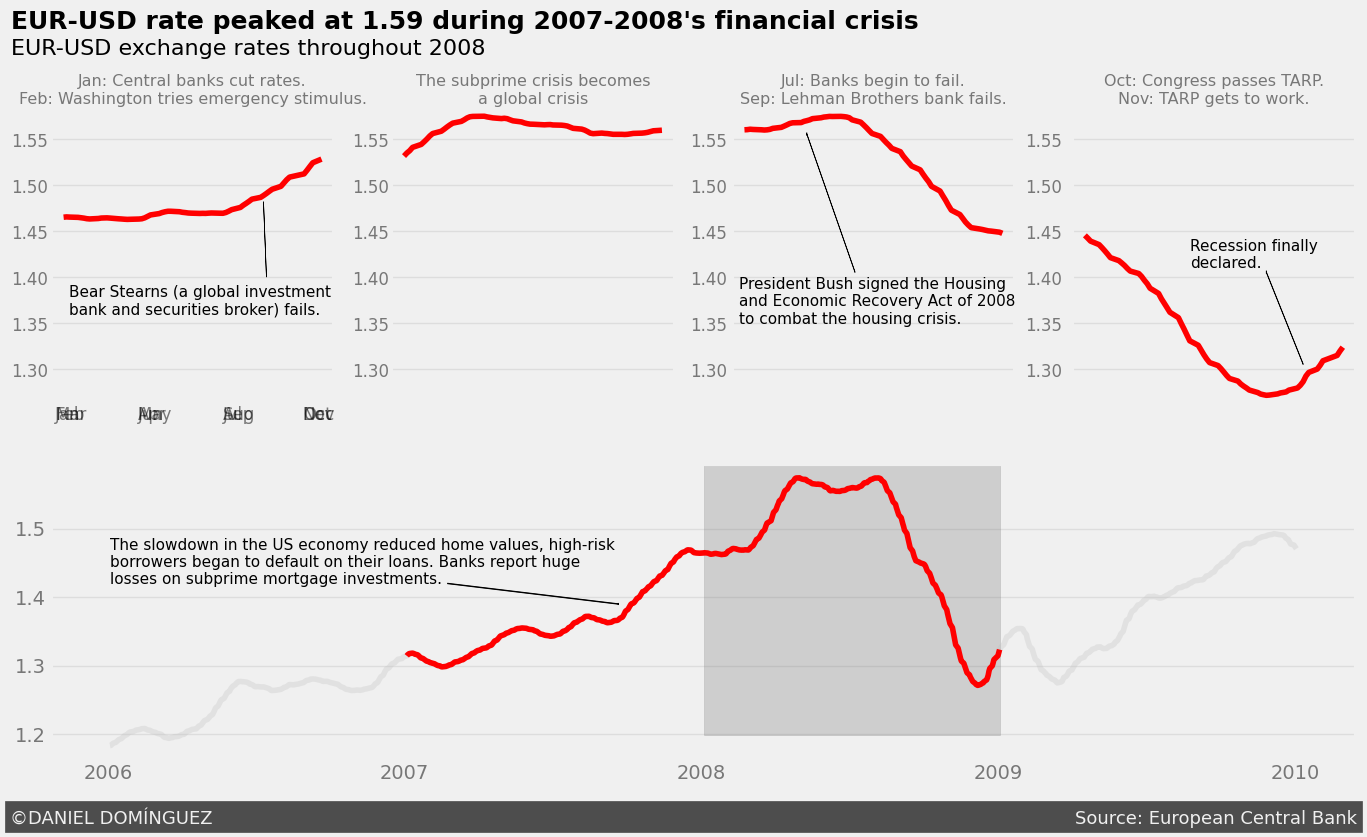

In [61]:
style.use('fivethirtyeight')

plt.figure(figsize = (15, 8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)

qts = [('Jan', 'Feb', 'Mar'), ('Apr', 'May', 'Jun'), ('Jul', 'Aug', 'Sep'), ('Oct', 'Nov', 'Dec')]
exc_rates = ['1.30', '1.35', '1.40', '1.45', '1.50', '1.55']
axes = [ax1, ax2, ax3, ax4]
titles = ['Jan: Central banks cut rates.\nFeb: Washington tries emergency stimulus.',
          'The subprime crisis becomes\na global crisis',
          'Jul: Banks begin to fail.\nSep: Lehman Brothers bank fails.',
          'Oct: Congress passes TARP.\nNov: TARP gets to work.']

x, y = 13877, 1.292
xpos_zoom = 13862

for ax, df, months, title in zip(axes,[fc_us_q1, fc_us_q2, fc_us_q3, fc_us_q4], qts, titles):
    ax.plot(df['Time'], df['rolling_mean'], color = 'red')
    ax.set_ylim(1.26, 1.58)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title, fontsize = 11.5, alpha = 0.5)
    
    for month in months:
        ax.text(x, 1.245, month, alpha = 0.5, fontsize = 12)
        
    for er in exc_rates:
        ax.text(xpos_zoom, y, er, alpha = 0.5, fontsize = 12)
        y += 0.05

    ax.yaxis.grid(True, alpha = 0.5)
    ax.xaxis.grid(False)
    
    y = 1.292
    xpos_zoom += 90
    
ax1.text(13862, 1.67, 'EUR-USD rate peaked at 1.59 during 2007-2008\'s financial crisis', weight='bold', size=18)
ax1.text(13862, 1.642, 'EUR-USD exchange rates throughout 2008', size=16)
ax1.arrow(13950, 1.4, -1, 0.08, color='black')
ax1.annotate('Bear Stearns (a global investment\nbank and securities broker) fails.',
             xy=(13882, 1.36), fontsize=11)

ax3.arrow(14100, 1.405, -17, 0.15, color='black')
ax3.annotate('President Bush signed the Housing\nand Economic Recovery Act of 2008\nto combat the housing crisis.',
             xy=(14059, 1.35), fontsize=11)

ax4.arrow(14230, 1.305, -13, 0.1, color='black')
ax4.annotate('Recession finally\ndeclared.', xy=(14190, 1.41), fontsize=11)

ax5.plot(fc_us['Time'], fc_us['rolling_mean'], color='silver', alpha=0.3)
ax5.plot(fc_us_7_8['Time'], fc_us_7_8['rolling_mean'], color='red')
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.axvspan(xmin=13880, xmax=14245, ymin=0.08, alpha=0.3, color='grey')
ax5.arrow(13565, 1.42, 210, -0.03, color='black')
ax5.annotate('The slowdown in the US economy reduced home values, high-risk\nborrowers began to default on their loans. Banks report huge\nlosses on subprime mortgage investments.',
             xy=(13150, 1.42), fontsize=11)

ax5.text(13027, 1.07, '©DANIEL DOMÍNGUEZ' + ' ' * 150 + 'Source: European Central Bank',
         color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=13)

x = 13117
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax5.text(x, 1.135, year, alpha=0.5, fontsize=14)
    x += 365

y = 1.19
for year in ['1.2', '1.3', '1.4', '1.5']:
    ax5.text(13033, y, year, alpha=0.5, fontsize=14)
    y += 0.1

ax5.yaxis.grid(True, alpha=0.5)
ax5.xaxis.grid(False)

plt.show()

**Remarks:**
We can highlight three important moments of the financial crisis, which are very noticeable in the EUR-USD exchange rate.

- At the end of 2007, when the U.S. economy was under pressure, the EUR-USD exchange rate began to rise until reaching a plateau (December 2007); which would remain until almost the end of February 2008.
- Subsequently, during the month of March, the exchange rate continued to increase until it reached its maximum peak (1.59) in April, by which time it became clear that the crisis had already become a global problem.
- Since then, there were slight variations until the month of August, when we observed that the exchange rate began to decline until reaching the lowest value of the year in December. This is probably due to the actions taken by the government, which was already implementing strategies to face the crisis. However, in that month, the recession was officially declared.

As a further exploration, let's look at the performance of GDP per capita in the major [North American countries](https://ourworldindata.org/grapher/gdp-per-capita-growth?tab=chart&time=2006..2011&country=USA~CAN~MEX):

![gdp-per-capita-growth-North-America.png](https://i.postimg.cc/zDT8GHRb/gdp-per-capita-growth-North-America.png)

If we focus on the US chart, we'll observe a trajectory almost inverse to that of the EUR-USD exchange rate analyzed above. The main difference is that there is a year difference and this is due to the consequences caused by the global financial crisis.

***
## The 2007-2008's financial crisis in the EU

Now, we'll analyze the evolution of the EUR-GBP exchange rate during the financial crisis in Europe during the period [period 2009-2012](https://www.bankrate.com/banking/timeline-of-european-debt-crisis/).

- **2008:** Since the bankruptcy of the US investment bank Lehman Brothers (September 2008), in a matter of days, the crisis spread to Europe. The economies of Russia and Pakistan contracted and governments from England to Germany intervened to rescue the banks. Iceland went bankrupt.

- **2009:** Greek Debt is 113% of its GDP (€300B)  and ratings on Greek banks and sovereign debt drop. Meanwhile, the EUR-GBP exchange rate peaks (about 0.94) and the [UK unemployment rate](https://ourworldindata.org/grapher/uk-unemployment-rate-19712017?time=2007..2014) begins to rise significantly (from 5.8 to 7.7 percent) to peak in 2011 (8.1 percent).

[![uk-unemployment-rate-19712017.png](https://i.postimg.cc/QNcGn5vH/uk-unemployment-rate-19712017.png)](https://postimg.cc/dDQxh7sY)

- **2010:** The European Financial Stability Facility, or [EFSF](https://en.wikipedia.org/wiki/European_Financial_Stability_Facility), was created to provide loans to cash-strapped countries. The EFSF issues bonds that are guaranteed by the euro-area countries. The EFSF also props up floundering banks or financial institutions through loans to governments.

- **2011:** Crisis deepens. A permanent rescue fund is planned as European leaders look for resolution. Greece, Ireland, Portugal and Hungary are bailed out.

- **2012:** *Containing the crisis:* Countries and banks struggle to get balance sheets under control.

**Remarks:**

- Since the beginning of the crisis in Europe (September 2008) the EUR-GBP exchange rate started to increase until it reached its maximum value (approximately 0.94) at the beginning of 2009.

- In 2010, when the EFSF was created to help countries with liquidity problems, we see that the evolution of the EUR-GBP exchange rate started to decrease. However, at the end of the year it increased slightly again.

- At the beginning of 2011, the value of the EUR-GBP exchange rate was at a plateau. After that, a slight increase was observed until almost mid-year. In the meantime, the EU was bailing out the countries in its zone and at the same time implementing strategies to curb the financial crisis. This apparently influenced the exchange rate, as we can see how the trajectory started to decline again.

- This decline continued until shortly after the middle of 2012, when the exchange rate would reach a value very close to what it was at the beginning of the global financial crisis.

Now, let's look at the evolution of GDP per capita in the main [European countries](https://ourworldindata.org/grapher/gdp-per-capita-growth?tab=chart&time=2006..2011&country=GBR~IRL~FRA~DEU~ITA):

![gdp-per-capita-growth-EU.png](https://i.postimg.cc/bN88DYQ6/gdp-per-capita-growth-EU.png)

We note that while the EUR-GBP exchange rate peaks in 2009, in the same year, the United Kingdom records the lowest value of GDP per capita growth. The same is true for the other European countries.

### - [Brexit](https://commonslibrary.parliament.uk/research-briefings/cbp-7960/)

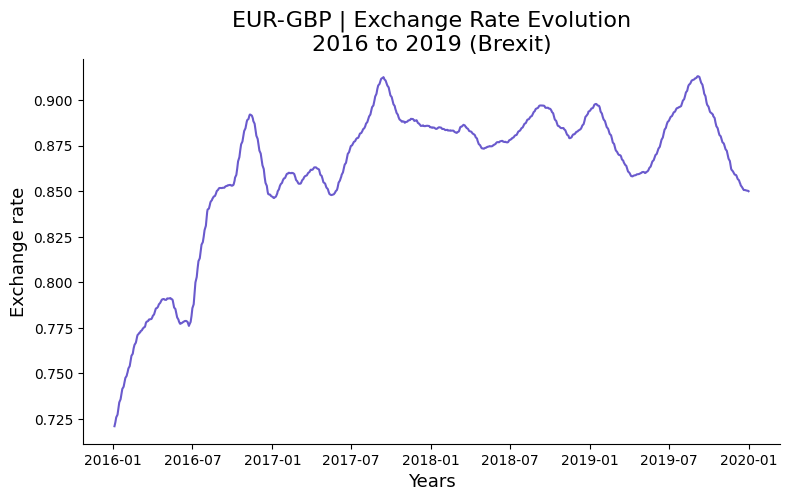

In [62]:
brexit = euro_to_gbp.copy()[(euro_to_gbp['Time'].dt.year >= 2016) & (euro_to_gbp['Time'].dt.year < 2020)]

style.use('default')

plt.figure(figsize=(9, 5))
title = 'EUR-GBP | Exchange Rate Evolution\n2016 to 2019 (Brexit)'
gen_line_plot(brexit, 'Time', 'rolling_mean', 'slateblue', title, 'Years', 'Exchange rate')

After the global financial crisis, we observe again an increase in the EUR-GBP exchange rate. To be somewhat more precise, in 2016; when in June of that year, the United Kingdom votes in favor of leaving the European Union. Subsequently, after several agreements and negotiations, in January 2020 the UK parliament finally approved the Brexit agreement. However, this would have a transition period, which would end on December 31 of the same year.

We have seen how the EUR-GBP exchange rate increased in value immediately after the Brexit referendum in 2016 (sterling decreased in value). The exchange rate maintained high values during the Brexit period; although slight declines were observed. This is because there were times when the Brexit was planned to be suspended, which gave companies more room to plan and thus the pound gained value.

***
## Conclusion

In this project, we explored the evolution of the EUR-USD exchange rate during the 2007-2008 financial crisis and also the effects it had on the EUR-GBP exchange rate afterwards. In addition, we briefly examine the volatility of the EUR-GBP exchange rate during the period 2016-2019 (Brexit). In the following we present the main facts related to both exchange rates:

* The financial crisis of 2007-2008 had a significant impact on the EUR-USD exchange rate. It increased rapidly from the end of 2007 until reaching a brief plateau from December to the end of February 2008. Subsequently, it continued to rise until reaching its peak value (approximately 1.59) in April, when the global financial crisis was declared.

* At that time, the EUR-GBP (UK) exchange rate was at a plateau, which would remain with minimal variations for just over 4 months. However, in September, its value would increase rapidly until it reached its maximum peak (0.94 approximately) in January 2009, when the unemployment rate in the United Kingdom began to increase significantly.

* In that same year, in the midst of the global crisis, both North American and European countries recorded the lowest GDP growth values.

* Similarly, as the US faced the crisis and Europe implemented strategies to rescue countries with financial problems (the financial crisis was coming under control), we see that both exchange rates (EUR-USD and EUR-GBP) begin to show a downward trend. In addition, we also see GDP recovery in North American and European countries.

* However, in 2016, the EUR-GBP exchange rate increases again rapidly and remains at high values due to the negotiations for the exit of the United Kingdom from the European Union (Brexit).